In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import lstsq
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.7
2,9.95,2.21,3.0,0.9
3,9.93,2.30,2.5,1.1
4,9.88,2.30,2.5,0.9
...,...,...,...,...
223,8.98,3.00,0.0,1.5
224,8.91,3.10,0.0,1.6
225,8.80,3.20,0.0,1.4
226,8.73,3.10,0.0,1.5


In [5]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])


In [6]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.8
2,9.95,2.21,3.0,0.7
3,9.93,2.30,2.5,0.9
4,9.88,2.30,2.5,1.1
...,...,...,...,...
223,8.98,3.00,0.0,1.3
224,8.91,3.10,0.0,1.5
225,8.80,3.20,0.0,1.6
226,8.73,3.10,0.0,1.4


In [7]:
for index, columns in enumerate(["A", "B", "C", "D"]):
    for i in range(len(df)):
        fill_value = df[columns].iloc[0]
        df[f"{columns}_Lag_{i}"] = df[columns].shift(i, fill_value=fill_value)


C:\Users\Sam\AppData\Local\Temp/ipykernel_19952/3033583746.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{columns}_Lag_{i}"] = df[columns].shift(i, fill_value=fill_value)


In [8]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [9]:
df.drop(["A","B","C","D"],axis=1,inplace=True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df["D_Lag_0"]

0      0.8
1      0.8
2      0.7
3      0.9
4      1.1
      ... 
223    1.3
224    1.5
225    1.6
226    1.4
227    1.5
Name: D_Lag_0, Length: 228, dtype: float64

In [12]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [13]:
target.isnull().sum().sum()

0

In [14]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df,target)

In [16]:
y_test.isnull().sum().sum()

0

# Standard Linear Regression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
x_test.head(1)

,A_Lag_0,A_Lag_1,A_Lag_2,A_Lag_3,A_Lag_4,A_Lag_5,A_Lag_6,A_Lag_7,A_Lag_8,A_Lag_9,...,D_Lag_218,D_Lag_219,D_Lag_220,D_Lag_221,D_Lag_222,D_Lag_223,D_Lag_224,D_Lag_225,D_Lag_226,D_Lag_227
210,9.98,10.13,10.18,10.25,10.29,10.39,10.42,10.51,10.53,10.65,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [20]:
model.predict(x_test)

array([ 0.06376549,  1.34802614,  2.04229239,  3.00857132,  1.82862724,
        2.37823513, -0.27111607,  2.07528924,  1.41630318,  1.27886853,
        0.85474272,  2.37260139,  2.42677374,  2.53888883,  1.93535588,
        2.1034461 ,  0.60462404,  2.29273665,  3.48088108,  3.32133931,
        1.86992808,  2.1758557 ,  2.02423329,  2.61140297,  1.30886649,
        2.31194298,  2.44000072,  3.16131317,  2.17072751,  0.85327412,
        2.88173198,  0.52591332,  1.94250676,  2.25686913,  1.65091314,
        0.81968096,  1.91683258,  1.95220243,  1.19309915,  1.1643362 ,
        2.31822691,  2.13012283,  2.95475037,  2.07322891,  1.62795218,
        3.65915559,  1.13108521,  2.39312342,  2.41065062,  1.5321317 ,
        1.8173015 ,  1.39309722,  1.66363923,  1.9174176 ,  1.45480758,
        2.12225073,  2.64699151])

In [21]:
y_test

210    0.2
133    0.8
74     2.2
152    3.0
94     1.8
36     2.6
201    0.4
118    2.1
225    1.4
174    1.6
177    0.7
162    2.4
144    2.3
86     2.2
71     2.3
77     2.0
197    0.5
142    1.9
112    3.7
151    2.5
63     2.1
83     2.3
72     1.9
157    2.7
173    1.6
159    2.6
90     2.4
107    3.1
69     2.4
2      0.9
145    2.4
187    0.4
16     1.8
26     2.2
103    1.7
1      0.7
49     2.4
56     2.1
215    1.1
224    1.6
45     2.3
13     1.9
29     2.9
67     2.4
219    1.9
111    3.3
135    1.6
20     2.4
21     2.4
227    1.3
59     2.0
9      1.3
120    1.1
92     1.8
42     2.0
70     2.2
143    2.2
Name: D, dtype: float64

In [22]:
r2_score(y_test, model.predict(x_test))

0.848636732308932

# Regularisation

In [23]:
myalphas = np.logspace(-6, 6, 13)
train_sizes = 150, 10

models = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression', 'Ridge regression using CV', 'Lasso regression using CV'

for train_size in train_sizes:
    print('Training with this many datapoints: ', train_size)
    for i, model in enumerate(models):
        print('Using regression of type: ', model_names[i])
        if model == LinearRegression:
            reg = model()
        else:
            print('Trying these complexity parameter values (i.e.alphas): ', myalphas)
            reg = model(alphas=myalphas)
        reg.fit(x_train,y_train)

        if model != LinearRegression:
            print('Using cross-validation got this value for the complexity parameter: ', reg.alpha_)
        for i, name in enumerate(["A","B","C","D"]):
            print('Parameter for {0} is {1}'.format(name,reg.coef_[i]))

        print('Error on held out set is: ', reg.score(x_test,y_test))
        print('\n\n')

Training with this many datapoints:  150
Using regression of type:  linear regression
Parameter for A is -0.26791548798169496
Parameter for B is -0.3200213779444059
Parameter for C is -0.09121595568101257
Parameter for D is 0.14869773835233674
Error on held out set is:  0.848636732308932



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  1.0
Parameter for A is -0.04685581391916466
Parameter for B is -0.04641850036966588
Parameter for C is -0.04352565949302538
Parameter for D is -0.013692937944353098
Error on held out set is:  0.922144279218912



Using regression of type:  Lasso regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]


G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e-01, tolerance: 1.352e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e-01, tolerance: 1.352e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e-02, to

Using cross-validation got this value for the complexity parameter:  0.001
Parameter for A is -0.0
Parameter for B is -0.0
Parameter for C is -0.0
Parameter for D is -0.0
Error on held out set is:  0.9020459479577689



Training with this many datapoints:  10
Using regression of type:  linear regression
Parameter for A is -0.26791548798169496
Parameter for B is -0.3200213779444059
Parameter for C is -0.09121595568101257
Parameter for D is 0.14869773835233674
Error on held out set is:  0.848636732308932



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  1.0
Parameter for A is -0.04685581391916466
Parameter for B is -0.04641850036966588
Parameter for C is -0.04352565949302538
Parameter for D is -0.013692937944353098
Error on held out set is:  0.922144279218912



Usin

G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e-01, tolerance: 1.352e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e-01, tolerance: 1.352e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e-02, to

Using cross-validation got this value for the complexity parameter:  0.001
Parameter for A is -0.0
Parameter for B is -0.0
Parameter for C is -0.0
Parameter for D is -0.0
Error on held out set is:  0.9020459479577689





G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.870e-01, tolerance: 1.689e-02
  model = cd_fast.enet_coordinate_descent(


# Polynomial Regression

In [24]:
df[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]]

,A_Lag_0,B_Lag_0,C_Lag_0,D_Lag_0
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.8
2,9.95,2.21,3.0,0.7
3,9.93,2.30,2.5,0.9
4,9.88,2.30,2.5,1.1
...,...,...,...,...
223,8.98,3.00,0.0,1.3
224,8.91,3.10,0.0,1.5
225,8.80,3.20,0.0,1.6
226,8.73,3.10,0.0,1.4


In [25]:
x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]].head(1)

,A_Lag_0,B_Lag_0,C_Lag_0,D_Lag_0
210,9.98,1.7,0.0,0.0


In [26]:
y_test

210    0.2
133    0.8
74     2.2
152    3.0
94     1.8
36     2.6
201    0.4
118    2.1
225    1.4
174    1.6
177    0.7
162    2.4
144    2.3
86     2.2
71     2.3
77     2.0
197    0.5
142    1.9
112    3.7
151    2.5
63     2.1
83     2.3
72     1.9
157    2.7
173    1.6
159    2.6
90     2.4
107    3.1
69     2.4
2      0.9
145    2.4
187    0.4
16     1.8
26     2.2
103    1.7
1      0.7
49     2.4
56     2.1
215    1.1
224    1.6
45     2.3
13     1.9
29     2.9
67     2.4
219    1.9
111    3.3
135    1.6
20     2.4
21     2.4
227    1.3
59     2.0
9      1.3
120    1.1
92     1.8
42     2.0
70     2.2
143    2.2
Name: D, dtype: float64

In [27]:

# polynomial features

# Pipeline: creates a pipeline of transforms with a final estimator.
model = make_pipeline(PolynomialFeatures(3),Ridge(alpha=0.1))
model.fit(x_train[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]], y_train)
y_plot = model.predict(x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]])

In [28]:
r2_score(y_test, model.predict(x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]]))

0.8831031884739573

# Piecewise Regression

In [29]:
ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

In [30]:
def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0]

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution)
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

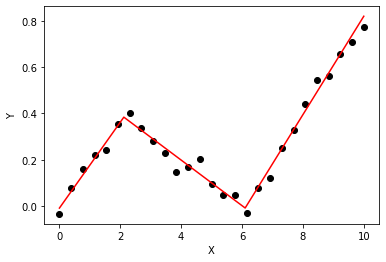

In [31]:
X = np.linspace( 0, 10, 27 )
Y = 0.2*X  - 0.3* ramp(X-2) + 0.3*ramp(X-6) + 0.05*np.random.randn(len(X))
plt.plot( X, Y, 'ok' );

initialBreakpoints = [1,7]
#Try also with 3 breakpoints, e.g. [3,5,6]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r' );
plt.xlabel('X'); plt.ylabel('Y');